# Rotating Coild Data Analysis for SI S15 Skew Excitation (M1)

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
magfiles = {
    'S15-004': [
        '2018-10-02_10-28-45_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_10-29-10_S15-004_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_10-29-34_S15-004_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_10-29-58_S15-004_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_10-30-22_S15-004_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_10-30-46_S15-004_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-02_10-31-10_S15-004_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_10-31-35_S15-004_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_10-31-59_S15-004_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_10-32-23_S15-004_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_10-32-47_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_10-33-12_S15-004_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_10-33-36_S15-004_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_10-34-01_S15-004_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_10-34-25_S15-004_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_10-34-49_S15-004_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-02_10-35-13_S15-004_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_10-35-37_S15-004_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_10-36-01_S15-004_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_10-36-25_S15-004_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_10-36-50_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-006': [
        '2018-10-02_14-50-27_S15-006_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-02_14-50-52_S15-006_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_14-51-16_S15-006_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_14-51-40_S15-006_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_14-52-04_S15-006_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_14-52-29_S15-006_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-02_14-52-52_S15-006_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_14-53-17_S15-006_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_14-53-41_S15-006_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_14-54-04_S15-006_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_14-54-29_S15-006_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_14-54-53_S15-006_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_14-55-17_S15-006_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_14-55-42_S15-006_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_14-56-05_S15-006_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_14-56-29_S15-006_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-02_14-56-52_S15-006_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_14-57-17_S15-006_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_14-57-41_S15-006_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_14-58-06_S15-006_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_14-58-31_S15-006_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-052': [
        '2018-10-03_11-57-14_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_11-57-38_S15-052_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_11-58-01_S15-052_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_11-58-26_S15-052_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_11-58-50_S15-052_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_11-59-15_S15-052_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-03_11-59-39_S15-052_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_12-00-03_S15-052_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_12-00-28_S15-052_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_12-00-51_S15-052_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_12-01-16_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_12-01-40_S15-052_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_12-02-03_S15-052_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_12-02-28_S15-052_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_12-02-52_S15-052_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_12-03-16_S15-052_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-03_12-03-40_S15-052_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_12-04-03_S15-052_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_12-04-28_S15-052_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_12-04-52_S15-052_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_12-05-16_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-070': [
        '2018-10-03_08-24-41_S15-070_BG_Imc=+0168A_Iqs=+0000A.dat',
        '2018-10-03_08-25-06_S15-070_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_08-25-30_S15-070_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_08-25-54_S15-070_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_08-26-18_S15-070_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_08-26-42_S15-070_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-03_08-27-06_S15-070_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_08-27-31_S15-070_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_08-27-55_S15-070_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_08-28-20_S15-070_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_08-28-44_S15-070_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_08-29-09_S15-070_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_08-29-34_S15-070_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_08-29-57_S15-070_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_08-30-22_S15-070_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_08-30-46_S15-070_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-03_08-31-11_S15-070_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_08-31-34_S15-070_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_08-31-58_S15-070_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_08-32-21_S15-070_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_08-32-47_S15-070_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-236': [
        '2018-10-01_11-36-04_S15-236_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_11-36-29_S15-236_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_11-36-53_S15-236_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_11-37-17_S15-236_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_11-37-41_S15-236_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_11-38-05_S15-236_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_11-38-30_S15-236_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_11-38-55_S15-236_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_11-39-18_S15-236_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_11-39-42_S15-236_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_11-40-07_S15-236_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_11-40-32_S15-236_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_11-40-56_S15-236_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_11-41-19_S15-236_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_11-41-44_S15-236_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_11-42-09_S15-236_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_11-42-33_S15-236_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_11-42-56_S15-236_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_11-43-21_S15-236_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_11-43-46_S15-236_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_11-44-09_S15-236_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-248': [
        '2018-10-01_13-58-57_S15-248_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_13-59-22_S15-248_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_13-59-46_S15-248_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_14-00-11_S15-248_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_14-00-35_S15-248_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_14-00-58_S15-248_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_14-01-23_S15-248_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_14-01-47_S15-248_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_14-02-10_S15-248_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_14-02-34_S15-248_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_14-02-58_S15-248_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_14-03-23_S15-248_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_14-03-46_S15-248_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_14-04-11_S15-248_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_14-04-35_S15-248_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_14-04-59_S15-248_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_14-05-23_S15-248_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_14-05-47_S15-248_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_14-06-11_S15-248_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_14-06-35_S15-248_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_14-06-59_S15-248_BG_Imc=+0168A_Iqs=-0000A.dat', 
    ],
    'S15-256': [
        '2018-10-01_15-51-41_S15-256_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_15-52-05_S15-256_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_15-52-29_S15-256_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_15-52-54_S15-256_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_15-53-17_S15-256_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_15-53-41_S15-256_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_15-54-04_S15-256_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_15-54-28_S15-256_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_15-54-52_S15-256_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_15-55-16_S15-256_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_15-55-40_S15-256_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_15-56-03_S15-256_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_15-56-27_S15-256_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_15-56-52_S15-256_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_15-57-15_S15-256_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_15-57-40_S15-256_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_15-58-05_S15-256_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_15-58-29_S15-256_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_15-58-52_S15-256_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_15-59-17_S15-256_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_15-59-42_S15-256_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
}

base_path = '/home/fac_files/lnls-ima/si-sextupoles-s15/model-07/measurement/magnetic/rotcoil/'
magnet_family = 'family_1/'
magnet_coil = 'main_qs/'
data_set = 'M1'


def load_rotcoil(serial, fname):
    path2 = base_path + magnet_family + serial + '/' + magnet_coil
    path3 = path2 + data_set + '/' + fname
    data = RotCoilData(path3, 1)
    return data
    
    
def load_data(magfiles):
    
    serials = tuple(magfiles.keys())
    
    shape = (len(serials), len(magfiles[serials[0]]))
    
    qs_coil_current_avg = np.zeros(shape)
    main_coil_current_avg = np.zeros(shape)
    nmpole_0 = np.zeros(shape)
    nmpole_1 = np.zeros(shape)
    nmpole_2 = np.zeros(shape)
    smpole_0 = np.zeros(shape)
    smpole_1 = np.zeros(shape)
    smpole_2 = np.zeros(shape)
    for i in range(len(serials)):
        files = magfiles[serials[i]]
        for j in range(len(files)):
            d = load_rotcoil(serials[i], files[j])
            main_coil_current_avg[i,j] = d.main_coil_current_avg
            qs_coil_current_avg[i,j] = d.qs_coil_current_avg
            nmpole_0[i,j] = d.intmpole_normal_avg[0]
            nmpole_1[i,j] = d.intmpole_normal_avg[1]
            nmpole_2[i,j] = d.intmpole_normal_avg[2]
            smpole_0[i,j] = d.intmpole_skew_avg[0]
            smpole_1[i,j] = d.intmpole_skew_avg[1]
            smpole_2[i,j] = d.intmpole_skew_avg[2]
    return serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2, 


data = load_data(magfiles)

<IPython.core.display.Javascript object>


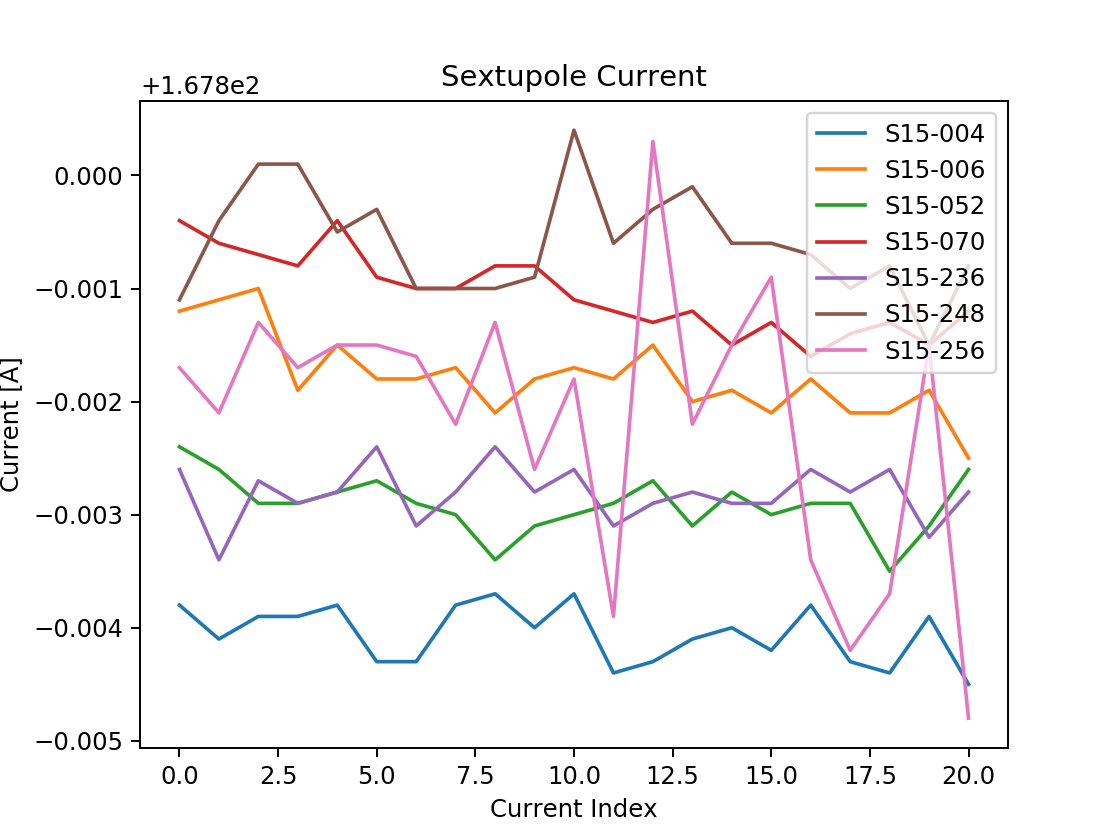

In [3]:
# Sextupole Current

serials, tdata = data[0], data[1]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Sextupole Current')
plt.legend()
plt.show()    

<IPython.core.display.Javascript object>


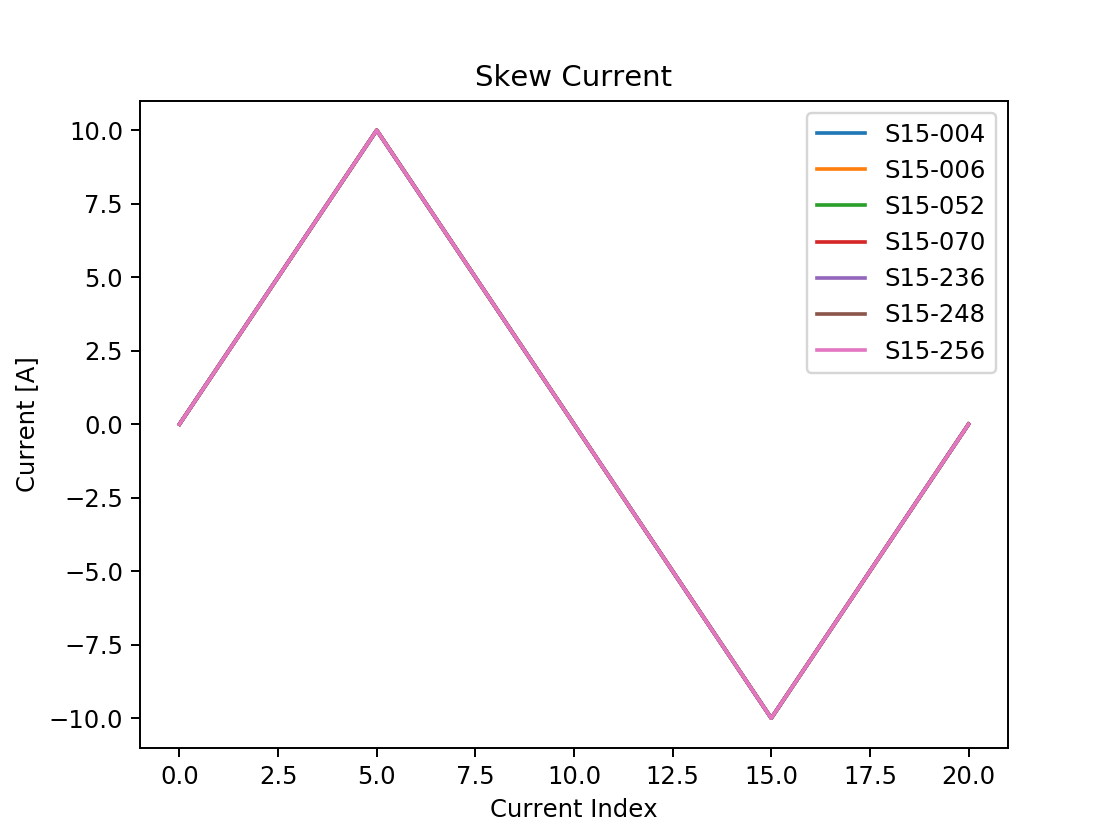

Currents:
index 00 :  -0.00 A
index 01 :  +2.00 A
index 02 :  +4.00 A
index 03 :  +6.00 A
index 04 :  +8.00 A
index 05 : +10.00 A
index 06 :  +8.00 A
index 07 :  +6.00 A
index 08 :  +4.00 A
index 09 :  +2.00 A
index 10 :  +0.00 A
index 11 :  -2.00 A
index 12 :  -4.00 A
index 13 :  -6.00 A
index 14 :  -8.00 A
index 15 : -10.00 A
index 16 :  -8.00 A
index 17 :  -6.00 A
index 18 :  -4.00 A
index 19 :  -2.00 A
index 20 :  +0.00 A


In [4]:
# Skew Coil Current

serials, tdata = data[0], data[2]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Skew Current')
plt.legend()
plt.show()

print('Currents:')
avg = np.mean(tdata,0)
for i in range(len(avg)):
    print('index {:02d} : {:+6.2f} A'.format(i, avg[i]))

<IPython.core.display.Javascript object>


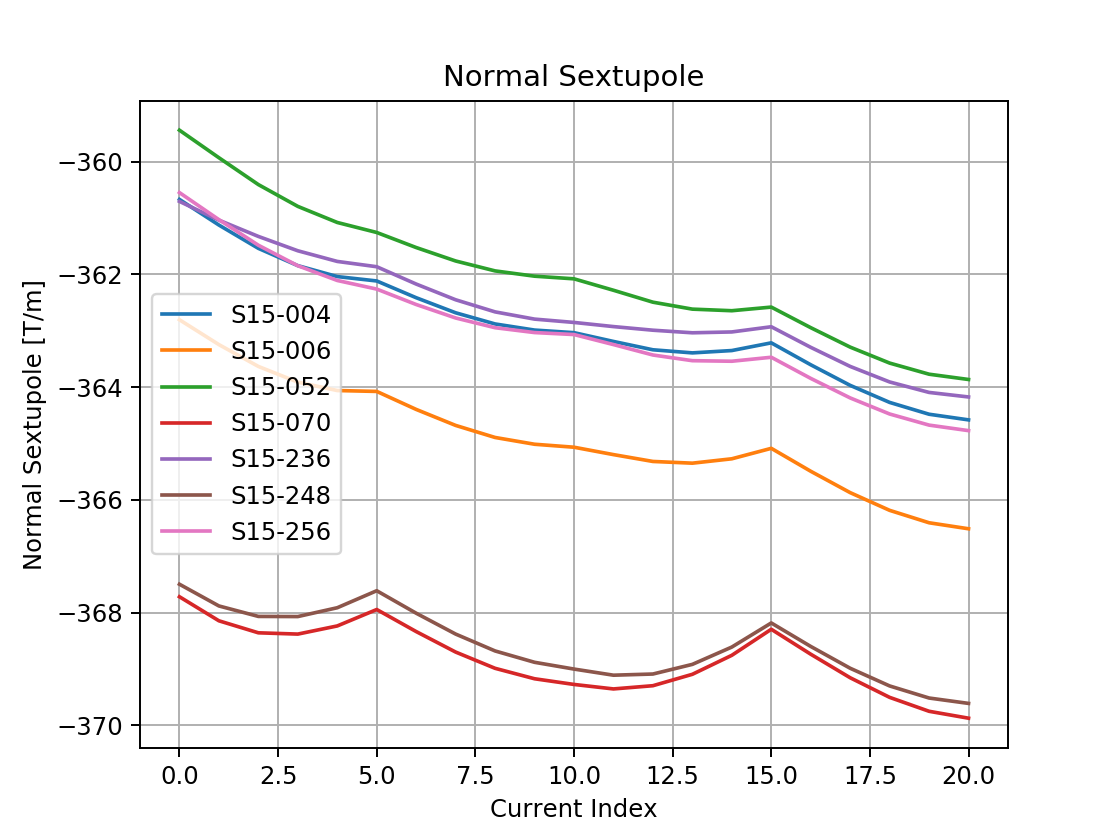

<IPython.core.display.Javascript object>


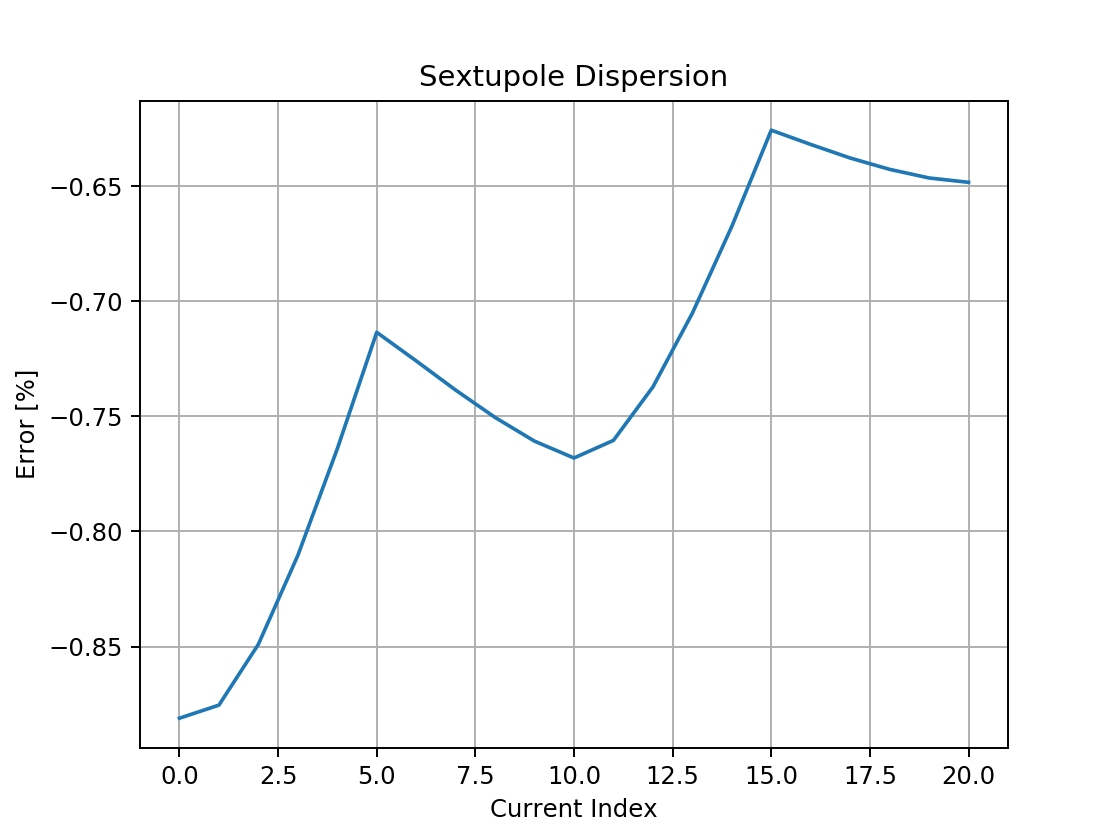

<IPython.core.display.Javascript object>


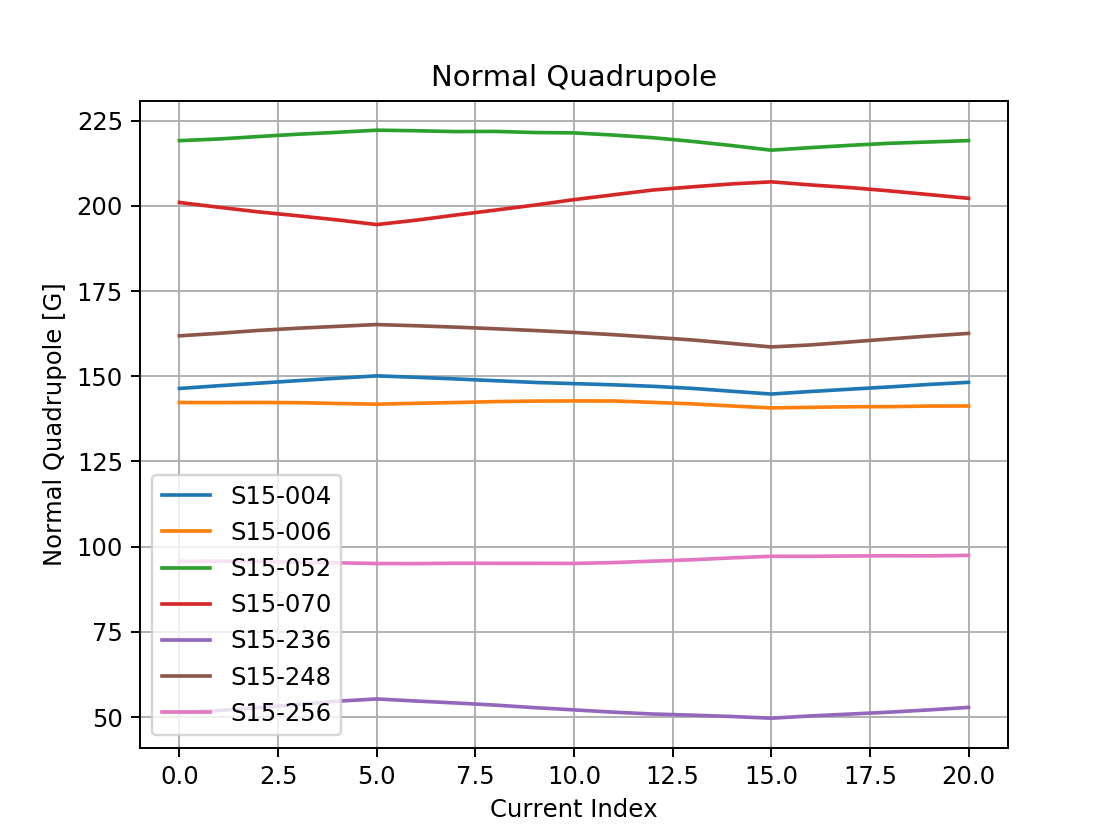

<IPython.core.display.Javascript object>


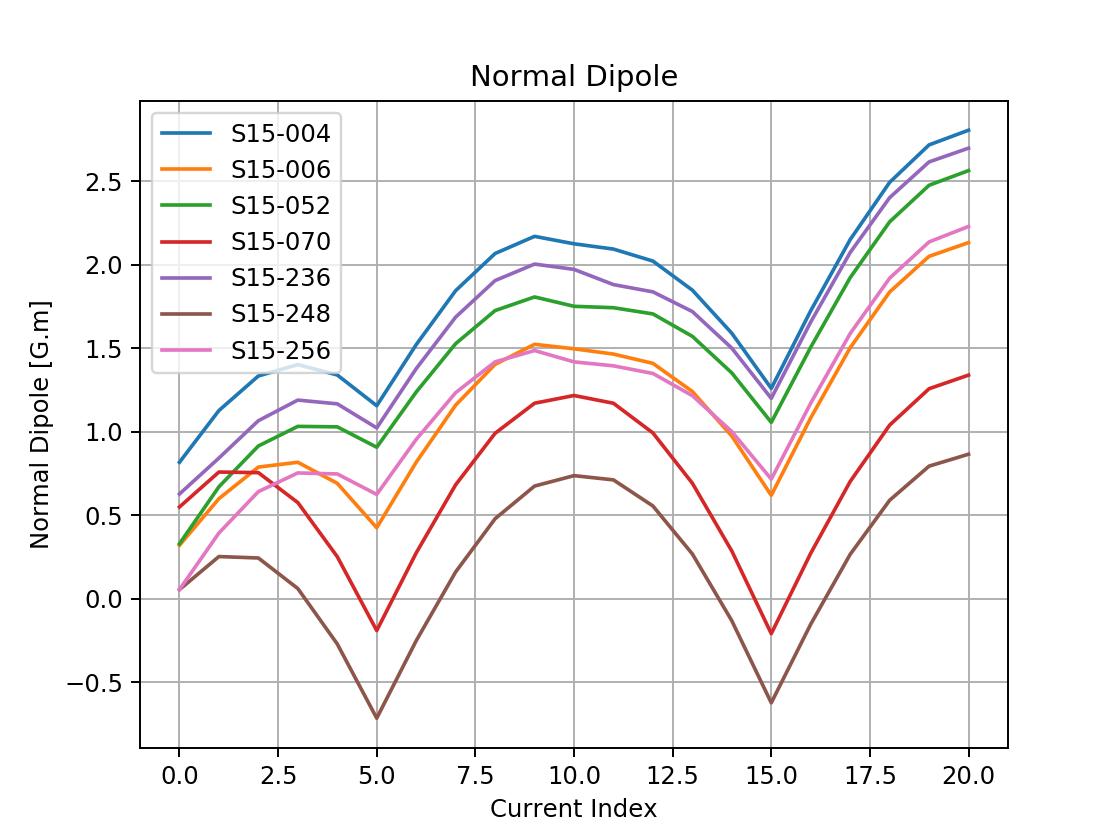

In [5]:
# Normal Sextupole
serials, tdata = data[0], data[5]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Sextupole [T/m]')
plt.title('Normal Sextupole')
plt.legend()
plt.grid()
plt.show()

avg = np.mean(tdata, 0)
std = np.std(tdata, 0)
plt.figure()
plt.plot(100*std/avg)
plt.xlabel('Current Index')
plt.ylabel('Error [%]')
plt.title('Sextupole Dispersion')
plt.grid()
plt.show()
# print(std/avg)

# Normal Quadrupole
serials, tdata = data[0], data[4]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Quadrupole [G]')
plt.title('Normal Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Normal Dipole
serials, tdata = data[0], data[3]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Dipole [G.m]')
plt.title('Normal Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


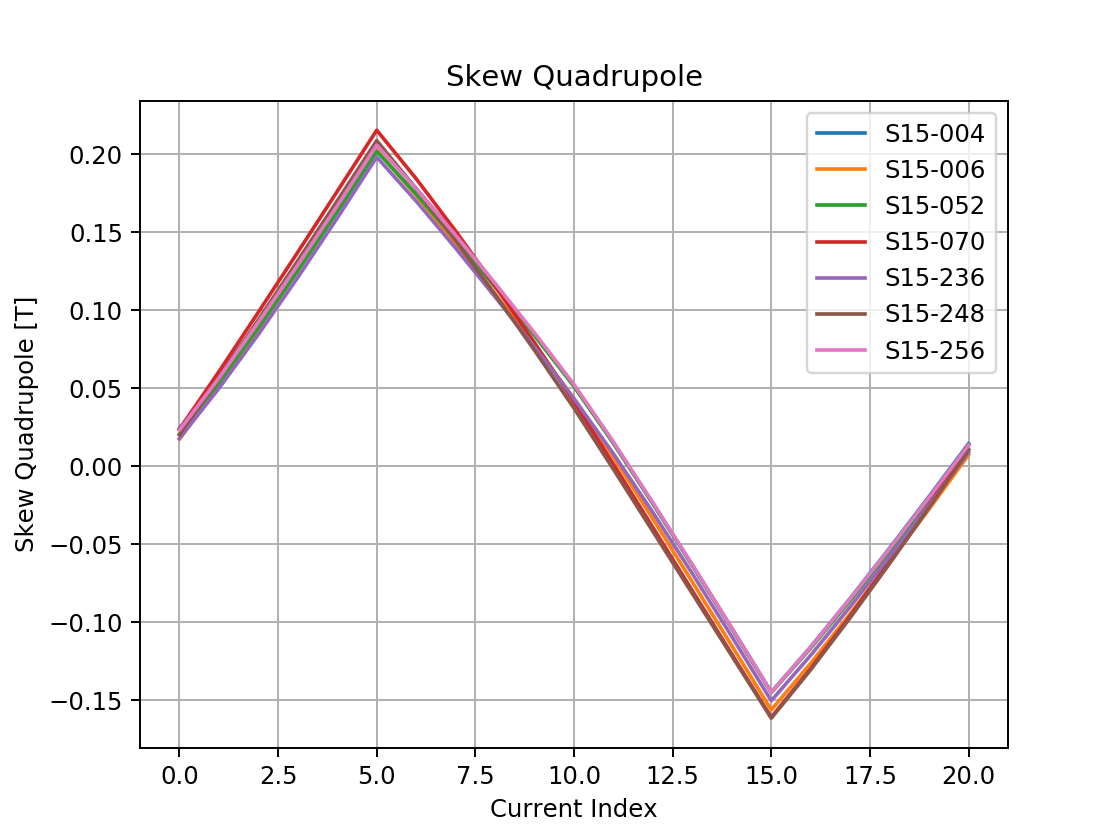

<IPython.core.display.Javascript object>


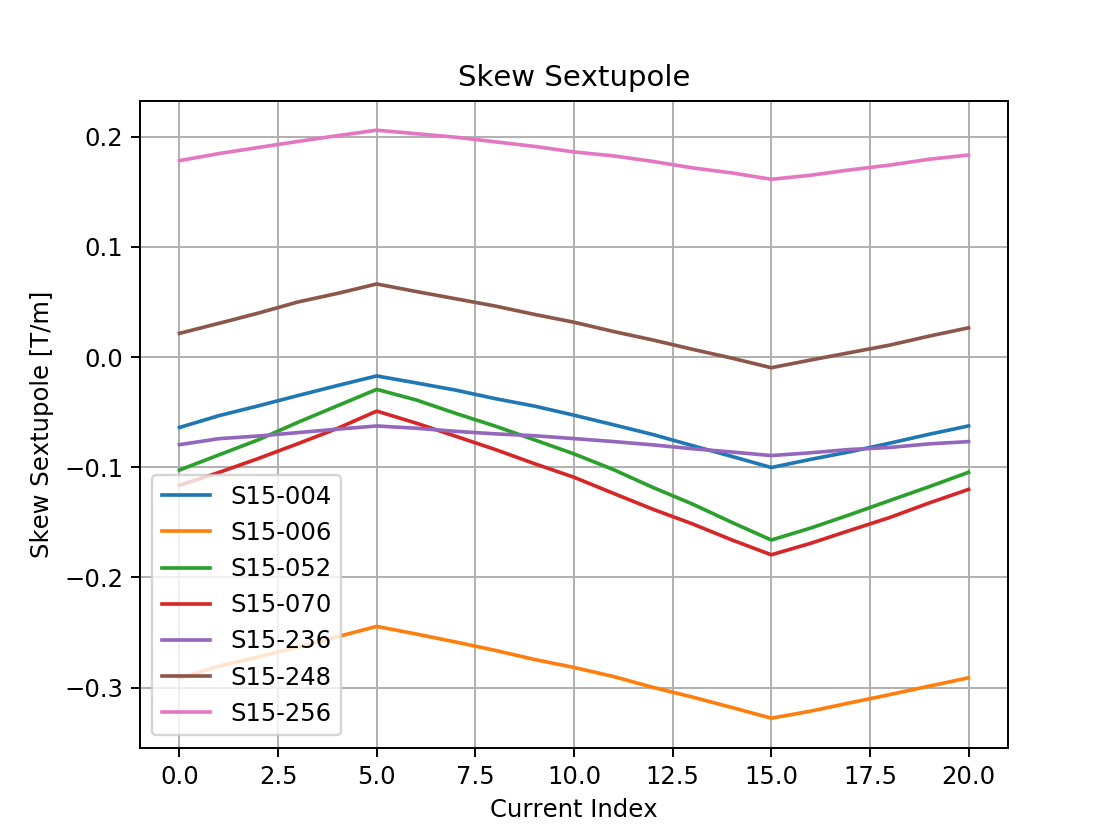

<IPython.core.display.Javascript object>


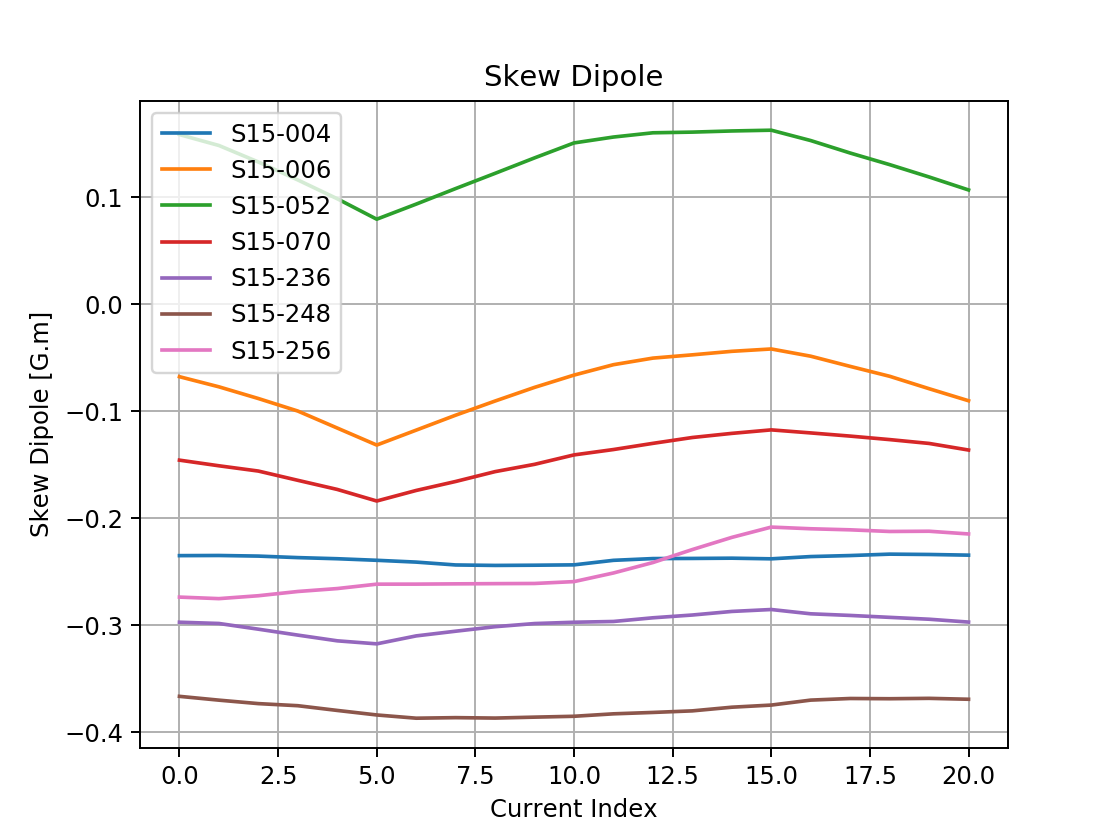

In [6]:
# Skew Quadrupole
serials, tdata = data[0], data[7]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Quadrupole [T]')
plt.title('Skew Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Skew Sextupole
serials, tdata = data[0], data[8]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Sextupole [T/m]')
plt.title('Skew Sextupole')
plt.legend()
plt.grid()
plt.show()

# Skew Dipole
serials, tdata = data[0], data[6]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Dipole [G.m]')
plt.title('Skew Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


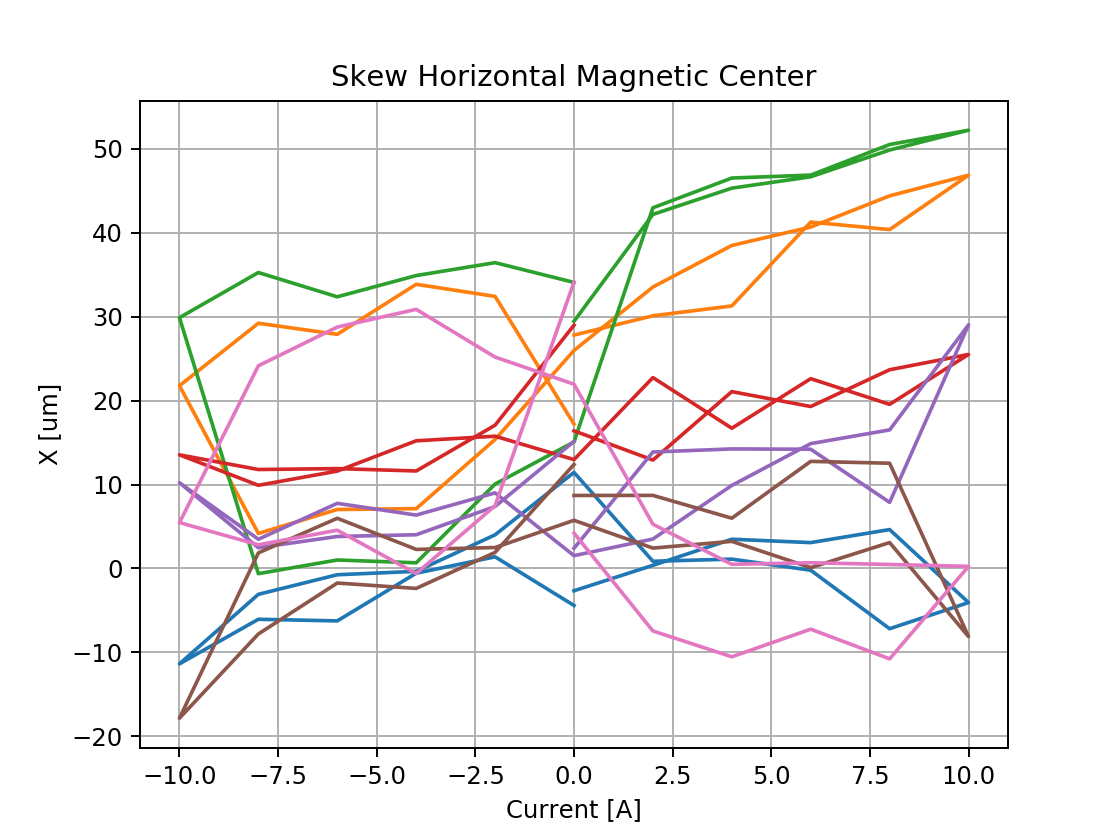

<IPython.core.display.Javascript object>


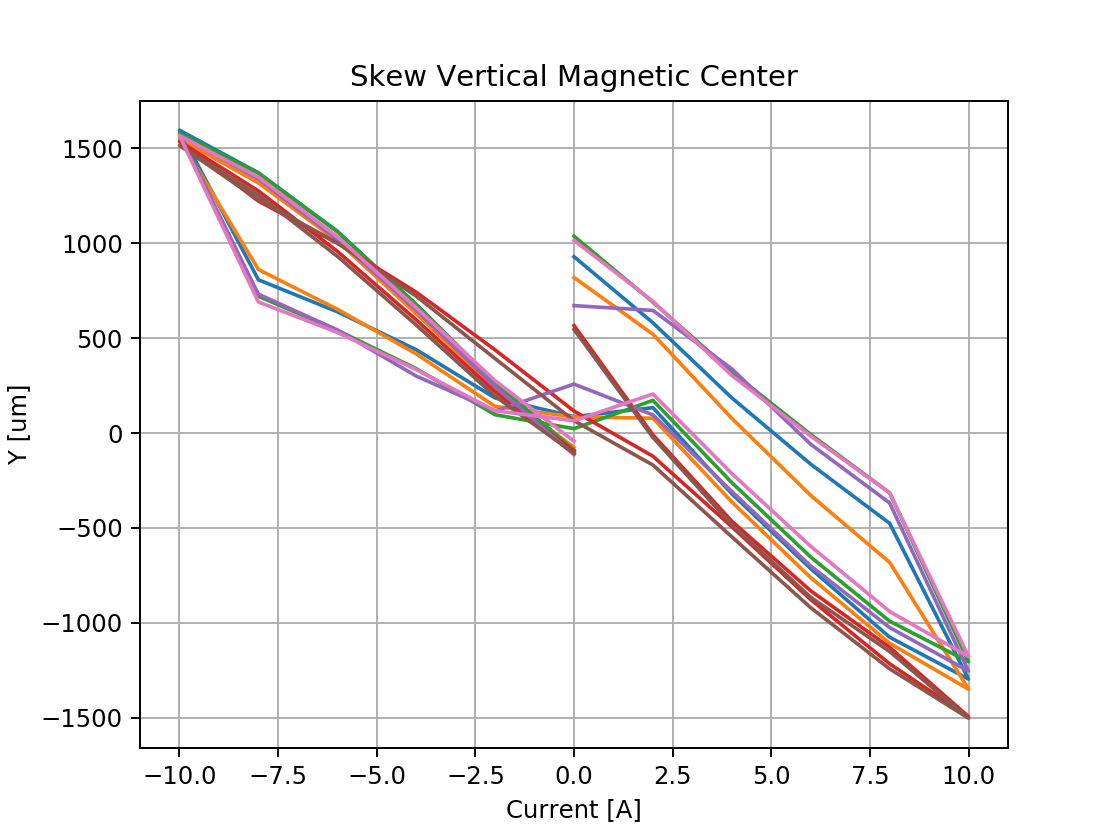

<IPython.core.display.Javascript object>


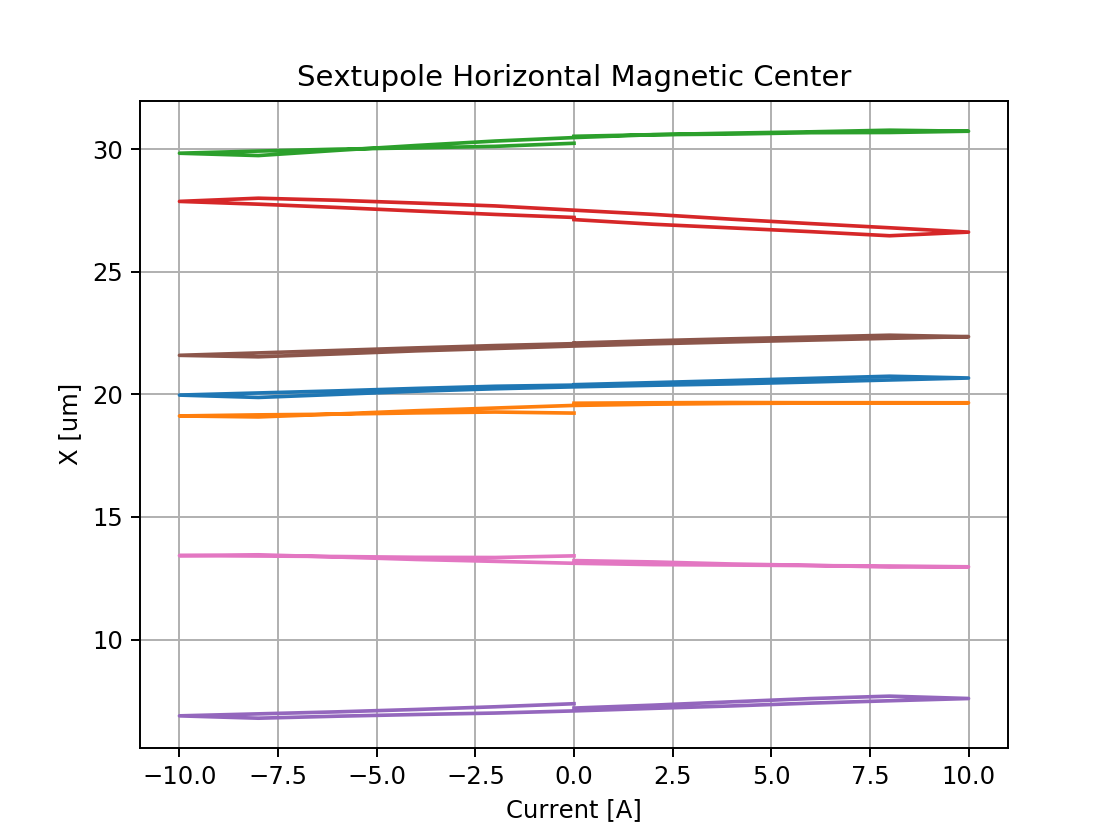

<IPython.core.display.Javascript object>


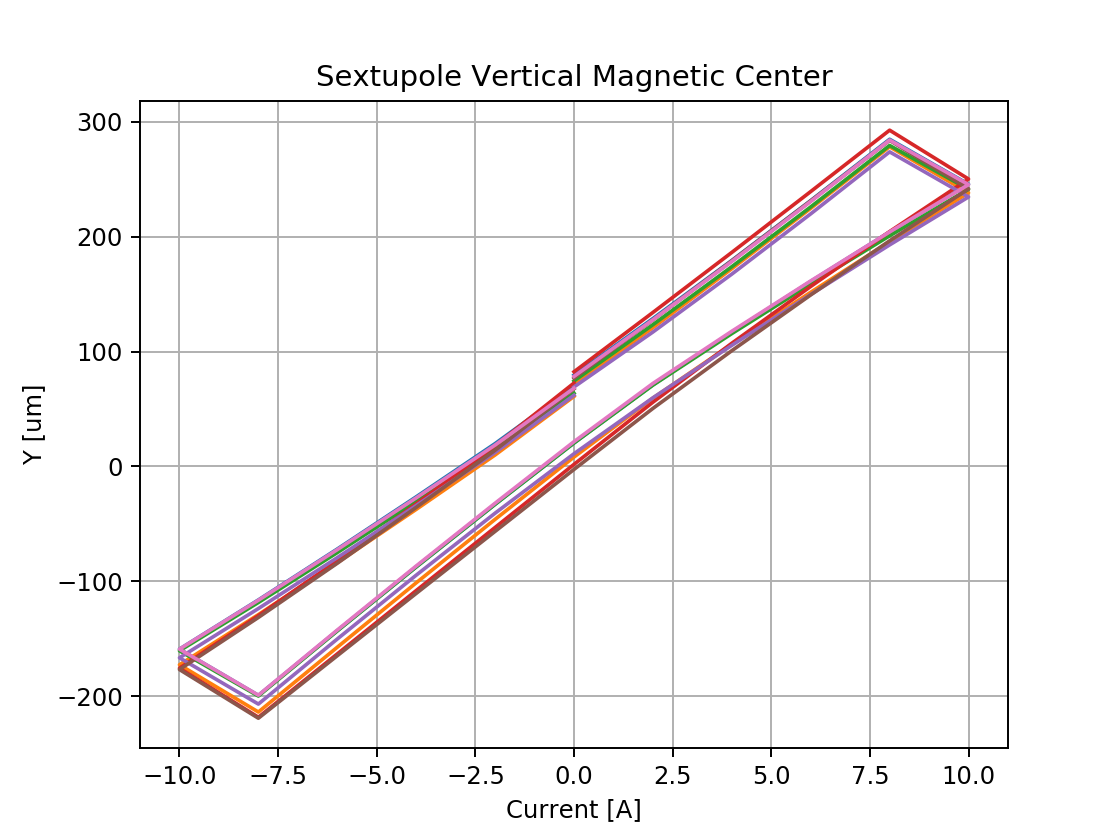

In [8]:
serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2 = data
    
shape = main_coil_current_avg.shape

ind = np.array([i for i in range(shape[1])])
step = 1.0

zskew = []
zsext = []
Il = []
for j in range(shape[0]):
    D = nmpole_0[j,:] + 1j * smpole_0[j,:]
    Q = nmpole_1[j,:] + 1j * smpole_1[j,:]
    S = nmpole_2[j,:] + 1j * smpole_2[j,:]
    fD = interp1d(ind, D, kind='cubic', fill_value='extrapolate')
    fQ = interp1d(ind, Q, kind='cubic', fill_value='extrapolate')
    fS = interp1d(ind, S, kind='cubic', fill_value='extrapolate')
    fI = interp1d(ind, qs_coil_current_avg[j,:], kind='cubic', fill_value='extrapolate')
    Dl = (fD(ind + step) - fD(ind - 0*step/2))/step
    Ql = (fQ(ind + step) - fQ(ind - 0*step/2))/step
    QlSext = fQ(ind + step)
    Sl = fS(ind + step)
    Il.append(fI(ind))  
    zskew.append(-Dl/Ql)
    zsext.append(-QlSext/Sl/2.0)
    

# plot skew center 

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(Il[i], 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Skew Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(Il[i], 1e6*np.imag(z))
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Skew Vertical Magnetic Center')
plt.show()


# plot sextupole center 

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    plt.plot(Il[i], 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Sextupole Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    plt.plot(Il[i], 1e6*np.imag(z))
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Sextupole Vertical Magnetic Center')
plt.show()

<IPython.core.display.Javascript object>


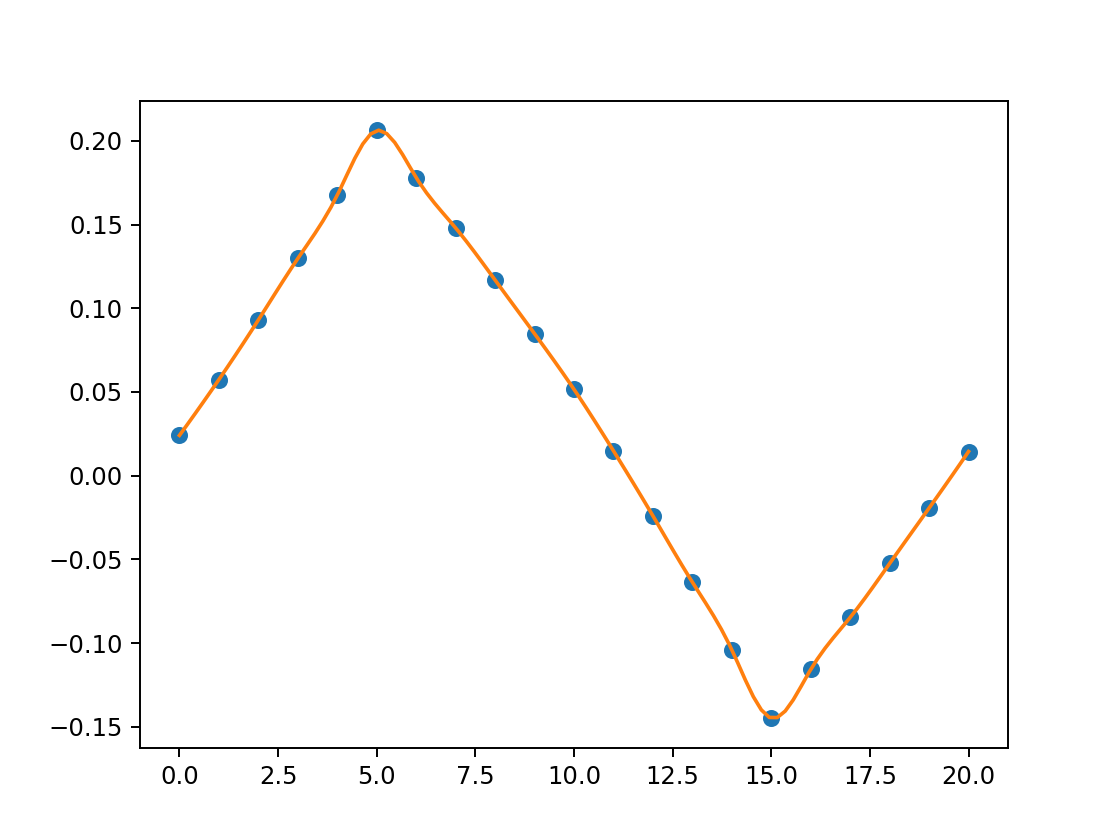

In [21]:
# test interpolation

plt.figure()
shape = main_coil_current_avg.shape
ind = np.array([i for i in range(shape[1])])
D = nmpole_0[0,:] + 1j * smpole_0[0,:]
Q = nmpole_1[0,:] + 1j * smpole_1[0,:]
fD = interp1d(ind, D, kind='cubic', fill_value='extrapolate')
fQ = interp1d(ind, Q, kind='cubic', fill_value='extrapolate')
ind2 = np.linspace(0,20,100)
plt.plot(np.imag(nmpole_1[0,:] + 1j * smpole_1[0,:]), 'o')
plt.plot(ind2, np.imag(fQ(ind2)))
plt.show()